In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Gaussian Naive Bayes
Assumes that data from each label is drawn from a simple Gaussian (normal) distribution

Good to work with when:
- categories are very well separated
- model complexity is less important

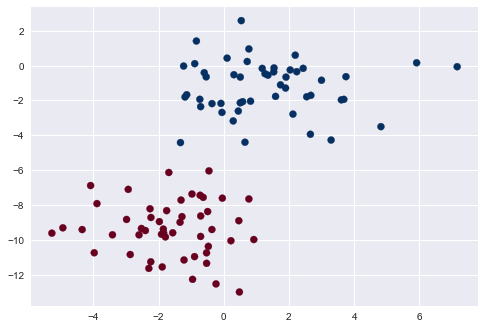

In [9]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.show() 

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None)

In [11]:
# generate some data and predict the label
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

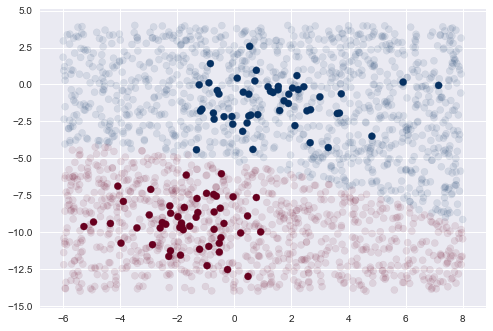

In [12]:
# and plot the new data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=50, cmap='RdBu', alpha=0.1)
plt.show()

# and here we have our predictions

In [14]:
# we can also try probabilistic classification
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[ 0.89,  0.11],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.15,  0.85]])

### Multinomial Naive Bayes
Most appropriate for features that represent counts or count rates

In [15]:
# let's prepare some data
from sklearn.datasets import fetch_20newsgroups  
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [16]:
# fetch some data
categories = ['talk.religion.misc', 'soc.religion.christian',
             'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [17]:
# create a pipeline that uses TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [18]:
# apply model to the training data and predict labels
model.fit(train.data, train.target)
labels = model.predict(test.data)

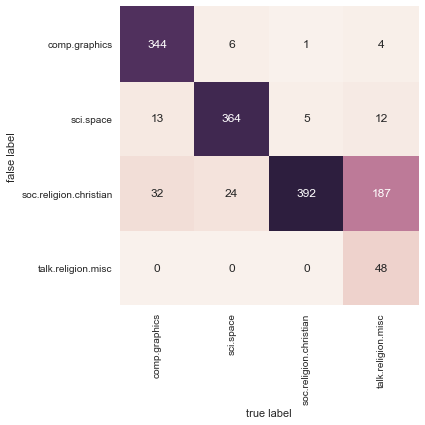

In [20]:
# confusion matrix between true and predicted labels for the data
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('false label')
plt.show()


In [36]:
# we can determine the category for any string
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

predict_category('visit the moon')


'sci.space'